In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

# %cd /content/drive/MyDrive/Colab Notebooks/Kaggle Tubular Playground Series/S4E8 Binary Prediction of Poisonous Mushrooms/

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/Kaggle Tubular Playground Series/S4E8 Binary Prediction of Poisonous Mushrooms


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
import lightgbm as lgb
import eda_util
import matplotlib.pyplot as plt

In [2]:
random_state = 1048576

target = 'Depression'

# Data Loading

In [3]:
test_csv = pd.read_csv('datasets/test.csv', index_col=0)
train_csv = pd.read_csv('datasets/train.csv', index_col=0)

In [4]:
train_csv.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [5]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

In [6]:
test_csv.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [7]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93800 entries, 140700 to 234499
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   93800 non-null  object 
 1   Gender                                 93800 non-null  object 
 2   Age                                    93800 non-null  float64
 3   City                                   93800 non-null  object 
 4   Working Professional or Student        93800 non-null  object 
 5   Profession                             69168 non-null  object 
 6   Academic Pressure                      18767 non-null  float64
 7   Work Pressure                          75022 non-null  float64
 8   CGPA                                   18766 non-null  float64
 9   Study Satisfaction                     18767 non-null  float64
 10  Job Satisfaction                       75026 non-null  float64
 11  S

# Train-Test Split

In [40]:
X, y = eda_util.feature_target.feature_target_split(train_csv, target=target)

X = X.drop('Name', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=random_state)

X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=random_state)
print(f'Shape of X_train is: {X_train.shape}; shape of y_train is: {y_train.shape}')
print(f'Shape of X_train is: {X_val.shape}; shape of y_train is: {y_val.shape}')
print(f'Shape of X_test is: {X_test.shape}; shape of y_test is: {y_test.shape}')

Shape of X_train is: (126630, 17); shape of y_train is: (126630,)
Shape of X_train is: (7035, 17); shape of y_train is: (7035,)
Shape of X_test is: (7035, 17); shape of y_test is: (7035,)


# Categorical Encoder

In [46]:
cat_features = X_train.columns[X_train.dtypes == 'object'].to_list()

num_features = [feature for feature in X_train.columns if feature not in cat_features]

print(f'Categorical features are: {cat_features}')
print(f'Numerical features are: {num_features}')

Categorical features are: ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
Numerical features are: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [47]:
cat_encoder = ColumnTransformer(
    [
        ('cat_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), cat_features)
    ], 
    remainder='passthrough'
)
cat_encoder.set_output(transform='pandas')
cat_encoder

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_encoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=nan),
                                 ['Gender', 'City',
                                  'Working Professional or Student',
                                  'Profession', 'Sleep Duration',
                                  'Dietary Habits', 'Degree',
                                  'Have you ever had suicidal thoughts ?',
                                  'Family History of Mental Illness'])])

In [48]:
X_train_encoded = cat_encoder.fit_transform(X_train).rename(columns=lambda x:x.split('__', 1)[-1]) # Discard the 'cat_encoder__' and 'passthrough__' prefices
X_train_encoded.head()

,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
id,,,,,,,,,,,,,,,,,
105012,0.0,3.0,1.0,53.0,25.0,13.0,82.0,0.0,1.0,35.0,NaN,2.0,NaN,NaN,5.0,8.0,3.0
22126,0.0,81.0,1.0,55.0,18.0,5.0,18.0,1.0,1.0,41.0,NaN,3.0,NaN,NaN,5.0,7.0,3.0
114397,1.0,87.0,1.0,21.0,15.0,18.0,18.0,0.0,1.0,45.0,NaN,4.0,NaN,NaN,3.0,6.0,4.0
54430,1.0,61.0,1.0,53.0,15.0,5.0,72.0,1.0,1.0,58.0,NaN,1.0,NaN,NaN,4.0,12.0,3.0
119777,1.0,55.0,0.0,NaN,27.0,5.0,22.0,1.0,0.0,28.0,5.0,NaN,9.05,2.0,NaN,7.0,4.0


In [49]:
X_val_encoded = cat_encoder.fit_transform(X_val).rename(columns=lambda x:x.split('__', 1)[-1])

# Model Building

## Base Model

In [50]:
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(X_train_encoded, y_train, test_size=0.1, random_state=random_state)
print(f'X_train_base shape: {X_train_base.shape}')
print(f'y_train_base shape: {y_train_base.shape}')
print(f'X_val_base shape: {X_val_base.shape}')
print(f'y_val_base shape: {y_val_base.shape}')

X_train_base shape: (113967, 17)
y_train_base shape: (113967,)
X_val_base shape: (12663, 17)
y_val_base shape: (12663,)


In [51]:
base_model = lgb.LGBMClassifier(random_state=random_state)
base_model.fit(X_train_encoded, y_train, categorical_feature=cat_features, eval_set=(X_val_encoded, y_val), eval_metric='accuracy')
print(f'Training Score: {accuracy_score(y_train, base_model.predict(X_train_encoded))}')
print(f'Test Score: {accuracy_score(y_test, base_model.predict(cat_encoder.transform(X_test)))}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 23038, number of negative: 103592
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 475
[LightGBM] [Info] Number of data points in the train set: 126630, number of used features: 17
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181932 -> initscore=-1.503315
[LightGBM] [Info] Start training from score -1.503315
Training Score: 0.9466556108347153
Test Score: 0.9395877754086709


In [52]:
base_model.best_score_

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('binary_logloss',
                           0.16495712326279444)])})

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

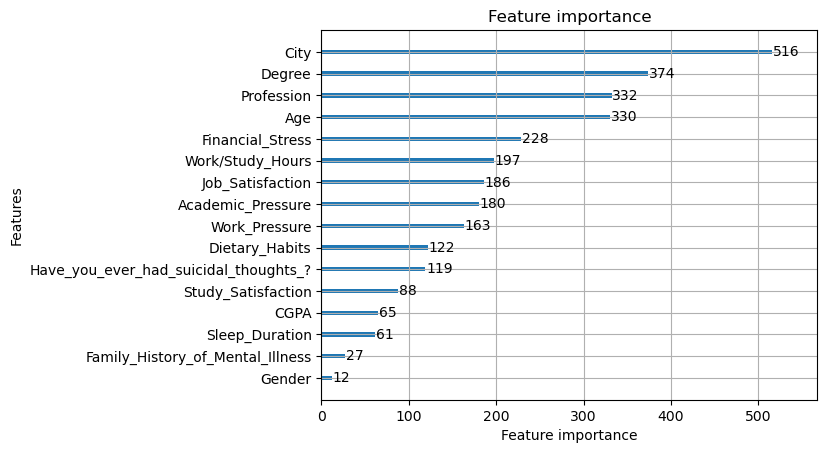

In [53]:
lgb.plot_importance(base_model)

# Submit Prediction

## Base Model

In [54]:
cat_encoder.transform(test_csv)

,cat_encoder__Gender,cat_encoder__City,cat_encoder__Working Professional or Student,cat_encoder__Profession,cat_encoder__Sleep Duration,cat_encoder__Dietary Habits,cat_encoder__Degree,cat_encoder__Have you ever had suicidal thoughts ?,cat_encoder__Family History of Mental Illness,remainder__Age,remainder__Academic Pressure,remainder__Work Pressure,remainder__CGPA,remainder__Study Satisfaction,remainder__Job Satisfaction,remainder__Work/Study Hours,remainder__Financial Stress
id,,,,,,,,,,,,,,,,,
140700,1.0,33.0,1.0,20.0,5.0,3.0,14.0,0.0,1.0,53.0,NaN,2.0,NaN,NaN,5.0,9.0,3.0
140701,0.0,14.0,1.0,12.0,5.0,3.0,3.0,0.0,0.0,58.0,NaN,2.0,NaN,NaN,4.0,6.0,4.0
140702,1.0,11.0,1.0,32.0,4.0,3.0,0.0,1.0,0.0,53.0,NaN,4.0,NaN,NaN,1.0,12.0,4.0
140703,0.0,24.0,0.0,NaN,6.0,3.0,11.0,1.0,0.0,23.0,5.0,NaN,6.84,1.0,NaN,10.0,4.0
140704,1.0,12.0,1.0,32.0,4.0,3.0,8.0,1.0,0.0,47.0,NaN,5.0,NaN,NaN,5.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,0.0,11.0,1.0,26.0,5.0,3.0,11.0,1.0,1.0,49.0,NaN,3.0,NaN,NaN,5.0,2.0,2.0
234496,1.0,1.0,1.0,26.0,4.0,3.0,9.0,1.0,1.0,29.0,NaN,5.0,NaN,NaN,1.0,11.0,3.0
234497,1.0,33.0,0.0,NaN,4.0,3.0,5.0,0.0,0.0,24.0,1.0,NaN,7.51,4.0,NaN,7.0,1.0


In [55]:
y_pred = base_model.predict(cat_encoder.transform(test_csv))

In [56]:
submission = pd.read_csv('datasets/sample_submission.csv', index_col=0)
print(submission.head())
submission[target] = y_pred
print('\n')
print(submission.head())
submission.to_csv('datasets/submission_LGBM_brute.csv')
print('Result saved successfully!')

        Depression
id                
140700           0
140701           0
140702           0
140703           0
140704           0


        Depression
id                
140700           0
140701           0
140702           0
140703           1
140704           0
Result saved successfully!
